In [1]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from keras.utils import plot_model


from src.data.make_dataset import BCIDataset
from src.models.ML_models import NN_model,LDA_model,QDA_model,XGB_model,SVM_model
from src.models.validate_models import validate_models_CV
from src.visualization.plotting import plot_history

%load_ext autoreload
%autoreload 2

# Get training data

In [2]:
data_root = "C:/Users/annag/OneDrive - Danmarks Tekniske Universitet/Semester_04/Special_Course_BCI/03_code/BCI_stroke_rehab/data/raw/"

subjects = ["nuria"]
measurements = ["nuri_06"]

In [3]:
trainingset = BCIDataset(data_root, subjects, measurements, measurement_length=3)
print(len(trainingset.data))

754


## Preprocessing

In [4]:
trainingset.validate_data()

Total invalid samples: 15


In [5]:
trainingset.apply_bandpass_filtering(selected_data="sample")

## Create training-set and test-set

In [6]:
test_size = 0.1
test_subjects = []

In [21]:
training_data_arr = trainingset.create_training_data(test_size, "class_as_array", num_components=4, test_subjects=test_subjects)
# training_data_key = trainingset.create_training_data(test_size, "class_as_key", num_components=None, test_subjects=test_subjects)

Split train/test-data randomly.
Split dataset in 665 train and 74 test samples.
COV with n_samples..
COV with n_samples..
Shape data_array: (739, 375, 16)
Selected CSP components: [15, 1, 14, 2]
Shape CSP data: (739, 375, 4)
Shape X_train: (665, 4)
Value of label corresponds to position in class array: ['arm_left' 'arm_right']


In [22]:
# training_data_key['train'].keys()

In [23]:
training_data_arr['train'].keys()

dict_keys(['X', 'y'])

# Classifiers

In [24]:
X_train = training_data_arr['train']['X']
y_train = training_data_arr['train']['y']

X_test = training_data_arr['test']['X']
y_test = training_data_arr['test']['y']

### LDA

In [25]:
clf_lda = LDA_model()
clf_lda = clf_lda.fit(X_train, y_train)

# Accuracy
score_train = accuracy_score(y_train, clf_lda.predict(X_train), sample_weight=None)
score_test = accuracy_score(y_test, clf_lda.predict(X_test))
print("LDA")
print(f"Test:{score_test}, Train:{score_train}")

LDA
Test:0.7432432432432432, Train:0.7413533834586467


### QDA

In [26]:
clf_qda = QDA_model()
clf_qda.fit(X_train, y_train)

# Accuracy
score_train = accuracy_score(y_train, clf_qda.predict(X_train))
score_test = accuracy_score(y_test, clf_qda.predict(X_test))

print("QDA")
print(f"Test:{score_test}, Train:{score_train}")

QDA
Test:0.6891891891891891, Train:0.7548872180451128


### XGB

In [27]:
clf_xgb = XGB_model()
clf_xgb.fit(X_train, y_train)

# Accuracy
score_train = accuracy_score(y_train, clf_xgb.predict(X_train))
score_test = accuracy_score(y_test, clf_xgb.predict(X_test))

print("XGBoost")
print(f"Test:{score_test}, Train:{score_train}")

XGBoost
Test:0.8108108108108109, Train:1.0


### SVM

In [28]:
clf_svm = SVM_model()
clf_svm.fit(X_train, y_train)

# Accuracy
score_train = accuracy_score(y_train, clf_svm.predict(X_train))
score_test = accuracy_score(y_test, clf_svm.predict(X_test))

print("SVM")
print(f"Test:{score_test}, Train:{score_train}")

SVM
Test:0.7567567567567568, Train:0.7969924812030075


### Simple NN

In [29]:
# Split into Validation and Test set
val_X, test_X, val_y, test_y = train_test_split(X_test, y_test, test_size=0.5, shuffle=True)

In [32]:
model = NN_model(X_train)
#plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

# Train model
epochs = 80
#batch_size = 5
batch_size = 10

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,
                    shuffle=True,
                    validation_data=(val_X, val_y), validation_batch_size=5)

Epoch 1/80
133/133 [==============================] - 1s 3ms/step - loss: 0.6885 - accuracy: 0.6962 - val_loss: 0.6806 - val_accuracy: 0.6486
Epoch 2/80
133/133 [==============================] - 0s 2ms/step - loss: 0.6731 - accuracy: 0.6602 - val_loss: 0.6568 - val_accuracy: 0.7838
Epoch 3/80
133/133 [==============================] - 0s 2ms/step - loss: 0.6452 - accuracy: 0.7218 - val_loss: 0.6175 - val_accuracy: 0.8378
Epoch 4/80
133/133 [==============================] - 0s 2ms/step - loss: 0.6045 - accuracy: 0.7459 - val_loss: 0.5602 - val_accuracy: 0.8649
Epoch 5/80
133/133 [==============================] - 0s 2ms/step - loss: 0.5636 - accuracy: 0.7474 - val_loss: 0.5142 - val_accuracy: 0.8649
Epoch 6/80
133/133 [==============================] - 0s 2ms/step - loss: 0.5334 - accuracy: 0.7519 - val_loss: 0.4835 - val_accuracy: 0.8649
Epoch 7/80
133/133 [==============================] - 0s 2ms/step - loss: 0.5149 - accuracy: 0.7489 - val_loss: 0.4677 - val_accuracy: 0.8649
Epoch 

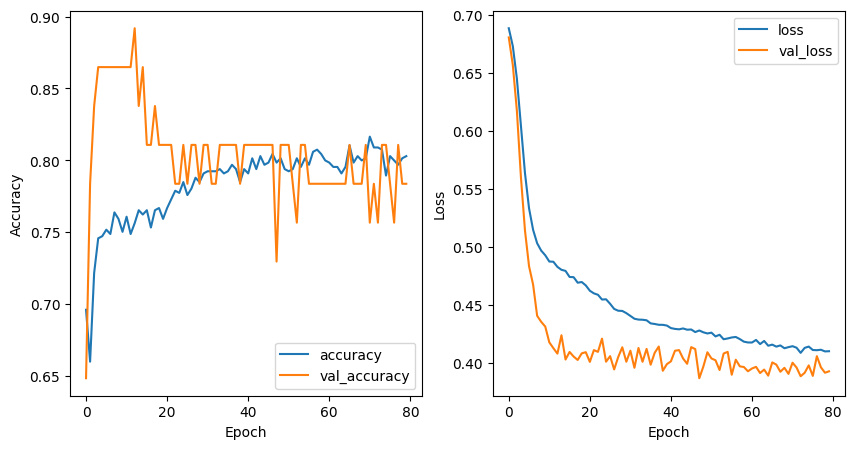

In [33]:
fig = plot_history(history)

In [34]:
# Accuracy
# Train
pred = model.predict(X_train)
pred_classes = np.rint(pred)
score_train = accuracy_score(y_train, pred_classes)
# Test
pred = model.predict(test_X)
pred_classes = np.rint(pred)
score_test = accuracy_score(test_y, pred_classes)

print("Neural Network")
print(f"Test:{score_test}, Train:{score_train}")

2/2 [==============================] - 0s 3ms/step
Neural Network
Test:0.7837837837837838, Train:0.8090225563909774


# Validation with Cross Validation (Stratified KFold)

In [8]:
data_root = "C:/Users/annag/OneDrive - Danmarks Tekniske Universitet/Semester_04/Special_Course_BCI/03_code/BCI_stroke_rehab/data/raw/"
# subjects = ["nuria"]
# measurements = ["nuri_06"] 

# subjects = ["anna", "dani", "pablo", "huiyu", "luisa", "manu", "sarah", "ivo", "irene", "fabio"]
# measurements = ["2023-03-10_18-04-54_move", "2023-03-10_18-14-09", "2023-03-10_18-22-48",
#                 "2023-03-07_18-29-54", "2023-03-07_18-48-22", "2023-03-07_19-00-01_move",
#                 "2023-03-10_15-30-01_move", "2023-03-10_15-40-28", "2023-03-10_15-50-40",
#                 "2023-03-09_15-45-59_move", "2023-03-09_15-57-32", "2023-03-09_16-09-04",
#                 "2023-03-10_17-26-16_move", "2023-03-10_17-35-13", "2023-03-10_17-44-40",
#                 "2023-03-20_16-27-55_move", "2023-03-20_16-37-23", "2023-03-20_16-51-03",
#                 "2023-03-10_16-35-20_move", "2023-03-10_16-44-51", "2023-03-10_16-58-25",
#                 "2023-03-09_16-37-21_move", "2023-03-09_16-50-05", "2023-03-09_17-03-08",
#                 "2023-03-21_15-27-37_move", "2023-03-21_15-37-54", "2023-03-21_15-49-00",
#                 "2023-03-21_16-15-57_move", "2023-03-21_16-26-21", "2023-03-21_16-36-55"]

# subjects = ["anna", "dani", "pablo", "huiyu", "luisa", "manu", "sarah", "irene", "fabio"]
# measurements = ["2023-03-10_18-04-54_move", "2023-03-10_18-14-09", "2023-03-10_18-22-48",
#                 "2023-03-07_18-29-54", "2023-03-07_18-48-22", "2023-03-07_19-00-01_move",
#                 "2023-03-10_15-30-01_move", "2023-03-10_15-40-28", "2023-03-10_15-50-40",
#                 "2023-03-09_15-45-59_move", "2023-03-09_15-57-32", "2023-03-09_16-09-04",
#                 "2023-03-10_17-26-16_move", "2023-03-10_17-35-13", "2023-03-10_17-44-40",
#                 "2023-03-20_16-27-55_move", "2023-03-20_16-37-23", "2023-03-20_16-51-03",
#                 "2023-03-10_16-35-20_move", "2023-03-10_16-44-51", "2023-03-10_16-58-25",
#                 "2023-03-21_15-27-37_move", "2023-03-21_15-37-54", "2023-03-21_15-49-00",
#                 "2023-03-21_16-15-57_move", "2023-03-21_16-26-21", "2023-03-21_16-36-55"]

subjects = ["ivo"]
measurements = []

num_components = [4]
#num_components=[2,4,None]

In [9]:
accuracies = validate_models_CV(data_root, subjects, measurements, num_folds = 10, num_components=num_components)
#accuracies = validate_models(data_root, subjects, measurements, num_folds = 10, num_components=[None])

Subjects: ['ivo']
Total invalid samples: 0
Fold 0
Train percentage: 0.9
Shape data_array: (120, 375, 16)
Selected CSP components: [15, 0, 14, 1]
Shape CSP data: (120, 375, 4)
Shape features: (120, 4)
1/1 [==============================] - 0s 23ms/step
Fold 1
Train percentage: 0.9
Shape data_array: (120, 375, 16)
Selected CSP components: [15, 0, 14, 1]
Shape CSP data: (120, 375, 4)
Shape features: (120, 4)
1/1 [==============================] - 0s 23ms/step
Fold 2
Train percentage: 0.9
Shape data_array: (120, 375, 16)
Selected CSP components: [15, 0, 14, 1]
Shape CSP data: (120, 375, 4)
Shape features: (120, 4)
1/1 [==============================] - 0s 22ms/step
Fold 3
Train percentage: 0.9
Shape data_array: (120, 375, 16)
Selected CSP components: [15, 0, 14, 1]
Shape CSP data: (120, 375, 4)
Shape features: (120, 4)
1/1 [==============================] - 0s 23ms/step
Fold 4
Train percentage: 0.9
Shape data_array: (120, 375, 16)
Selected CSP components: [14, 0, 15, 1]
Shape CSP data: (12

### 2 Components

In [4]:
print(f"LDA: train={np.mean(accuracies['2_components']['LDA']['train'])}; test={np.mean(accuracies['2_components']['LDA']['test'])}")
print(f"QDA: train={np.mean(accuracies['2_components']['QDA']['train'])}; test={np.mean(accuracies['2_components']['QDA']['test'])}")
print(f"XGB: train={np.mean(accuracies['2_components']['XGB']['train'])}; test={np.mean(accuracies['2_components']['XGB']['test'])}")
print(f"SVM: train={np.mean(accuracies['2_components']['SVM']['train'])}; test={np.mean(accuracies['2_components']['SVM']['test'])}")
print(f"NN: train={np.mean(accuracies['2_components']['NN']['train'])}; test={np.mean(accuracies['2_components']['NN']['test'])}")

LDA: train=0.6376811594202899; test=0.6130434782608696
QDA: train=0.6212560386473431; test=0.6026086956521739
XGB: train=0.9247342995169083; test=0.6165217391304348
SVM: train=0.683671497584541; test=0.6573913043478262
NN: train=0.665024154589372; test=0.6482758620689655


### 4 components

In [10]:
print(f"LDA: train={np.mean(accuracies['4_components']['LDA']['train'])}; test={np.mean(accuracies['4_components']['LDA']['test'])}")
print(f"QDA: train={np.mean(accuracies['4_components']['QDA']['train'])}; test={np.mean(accuracies['4_components']['QDA']['test'])}")
print(f"XGB: train={np.mean(accuracies['4_components']['XGB']['train'])}; test={np.mean(accuracies['4_components']['XGB']['test'])}")
print(f"SVM: train={np.mean(accuracies['4_components']['SVM']['train'])}; test={np.mean(accuracies['4_components']['SVM']['test'])}")
print(f"NN: train={np.mean(accuracies['4_components']['NN']['train'])}; test={np.mean(accuracies['4_components']['NN']['test'])}")

LDA: train=0.8546296296296296; test=0.7666666666666666
QDA: train=0.85; test=0.7416666666666667
XGB: train=1.0; test=0.7583333333333334
SVM: train=0.8703703703703705; test=0.7666666666666667
NN: train=0.7703703703703704; test=0.7333333333333333


### All components

In [6]:
print(f"LDA: train={np.mean(accuracies['None_components']['LDA']['train'])}; test={np.mean(accuracies['None_components']['LDA']['test'])}")
print(f"QDA: train={np.mean(accuracies['None_components']['QDA']['train'])}; test={np.mean(accuracies['None_components']['QDA']['test'])}")
print(f"XGB: train={np.mean(accuracies['None_components']['XGB']['train'])}; test={np.mean(accuracies['None_components']['XGB']['test'])}")
print(f"SVM: train={np.mean(accuracies['None_components']['SVM']['train'])}; test={np.mean(accuracies['None_components']['SVM']['test'])}")
print(f"NN: train={np.mean(accuracies['None_components']['NN']['train'])}; test={np.mean(accuracies['None_components']['NN']['test'])}")

LDA: train=0.643768115942029; test=0.6252173913043478
QDA: train=0.6793236714975845; test=0.6104347826086957
XGB: train=1.0; test=0.6547826086956523
SVM: train=0.7326570048309178; test=0.6704347826086956
NN: train=0.6553623188405797; test=0.6551724137931034


# Check subject-specific accuracy of all subjects

In [24]:
data_root = "C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/"
all_subjects = ["dani", "ivo", "pablo", "huiyu", "manu", "fabio", "anna", "luisa", "sarah", "irene", "jan"]
measurements = []

In [25]:
specific_acc = {'train':[], 'test':[]}
for sub in all_subjects:
    accuracies = validate_models_CV(data_root, [sub], measurements, num_folds = 10, num_components=num_components)
    train_acc = np.mean(accuracies['4_components']['SVM']['train'])
    test_acc = np.mean(accuracies['4_components']['SVM']['test'])
    print(f"Subject {sub}:\n SVM: train={train_acc}; test={test_acc}")
    
    specific_acc['train'].append(train_acc)
    specific_acc['test'].append(test_acc)

Define Dataset with subject ['dani'] and measurements []
Create dataframe, Subjects: ['dani'], measurements: []
folderpath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/dani/2023-03-07_18-29-54/
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/dani/2023-03-07_18-29-54/arm_left_10_1678210383.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/dani/2023-03-07_18-29-54/arm_left_11_1678210400.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/dani/2023-03-07_18-29-54/arm_left_12_1678210416.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/dani/2023-03-07_18-29-54/arm_left_13_1678210433.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/dani/2023-03-07_18-29-54/arm_left_15_1678210466.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/dani/2023-03-07_18-29-54/arm_left_1_1678210233.csv
filepath =

filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/dani/2023-03-07_18-48-22/arm_right_17_1678211528.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/dani/2023-03-07_18-48-22/arm_right_18_1678211541.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/dani/2023-03-07_18-48-22/arm_right_1_1678211326.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/dani/2023-03-07_18-48-22/arm_right_20_1678211566.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/dani/2023-03-07_18-48-22/arm_right_22_1678211592.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/dani/2023-03-07_18-48-22/arm_right_23_1678211604.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/dani/2023-03-07_18-48-22/arm_right_25_1678211630.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/dani/2023-03-0

1/1 [==============================] - 0s 28ms/step
Fold 2
Train percentage: 0.9
Shape data_array: (120, 375, 16)
Selected CSP components: [15, 0, 14, 1]
Shape CSP data: (120, 375, 4)
Shape features: (120, 4)
1/1 [==============================] - 0s 23ms/step
Fold 3
Train percentage: 0.9
Shape data_array: (120, 375, 16)
Selected CSP components: [15, 0, 14, 1]
Shape CSP data: (120, 375, 4)
Shape features: (120, 4)
1/1 [==============================] - 0s 23ms/step
Fold 4
Train percentage: 0.9
Shape data_array: (120, 375, 16)
Selected CSP components: [15, 0, 14, 1]
Shape CSP data: (120, 375, 4)
Shape features: (120, 4)
1/1 [==============================] - 0s 26ms/step
Fold 5
Train percentage: 0.9
Shape data_array: (120, 375, 16)
Selected CSP components: [15, 0, 14, 1]
Shape CSP data: (120, 375, 4)
Shape features: (120, 4)
1/1 [==============================] - 0s 31ms/step
Fold 6
Train percentage: 0.9
Shape data_array: (120, 375, 16)
Selected CSP components: [15, 0, 14, 1]
Shape CSP 

filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/ivo/2023-03-09_16-50-05/arm_left_34_1678377449.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/ivo/2023-03-09_16-50-05/arm_left_35_1678377462.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/ivo/2023-03-09_16-50-05/arm_left_37_1678377487.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/ivo/2023-03-09_16-50-05/arm_left_38_1678377500.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/ivo/2023-03-09_16-50-05/arm_left_39_1678377513.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/ivo/2023-03-09_16-50-05/arm_left_40_1678377526.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/ivo/2023-03-09_16-50-05/arm_left_8_1678377118.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/ivo/2023-03-09_16-50-05/arm_

filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/ivo/2023-03-09_17-03-08/arm_right_6_1678377919.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/ivo/2023-03-09_17-03-08/arm_right_7_1678377930.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/ivo/2023-03-09_17-03-08/arm_right_8_1678377941.csv
Total invalid samples: 0
Fold 0
Train percentage: 0.9
Shape data_array: (120, 375, 16)
Selected CSP components: [15, 0, 14, 1]
Shape CSP data: (120, 375, 4)
Shape features: (120, 4)
1/1 [==============================] - 0s 23ms/step
Fold 1
Train percentage: 0.9
Shape data_array: (120, 375, 16)
Selected CSP components: [15, 0, 14, 1]
Shape CSP data: (120, 375, 4)
Shape features: (120, 4)
1/1 [==============================] - 0s 22ms/step
Fold 2
Train percentage: 0.9
Shape data_array: (120, 375, 16)
Selected CSP components: [15, 0, 14, 1]
Shape CSP data: (120, 375, 4)
Shape features: (120, 4)
1/1 [===========

filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/pablo/2023-03-10_15-40-28/arm_left_2_1678459259.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/pablo/2023-03-10_15-40-28/arm_left_30_1678459558.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/pablo/2023-03-10_15-40-28/arm_left_34_1678459601.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/pablo/2023-03-10_15-40-28/arm_left_35_1678459612.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/pablo/2023-03-10_15-40-28/arm_left_36_1678459622.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/pablo/2023-03-10_15-40-28/arm_left_37_1678459633.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/pablo/2023-03-10_15-40-28/arm_left_39_1678459654.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/pablo/2023-03-

Total invalid samples: 3
Fold 0
Train percentage: 0.8974358974358975
Shape data_array: (117, 375, 16)
Selected CSP components: [15, 0, 14, 1]
Shape CSP data: (117, 375, 4)
Shape features: (117, 4)
1/1 [==============================] - 0s 24ms/step
Fold 1
Train percentage: 0.8974358974358975
Shape data_array: (117, 375, 16)
Selected CSP components: [15, 0, 14, 1]
Shape CSP data: (117, 375, 4)
Shape features: (117, 4)
1/1 [==============================] - 0s 30ms/step
Fold 2
Train percentage: 0.8974358974358975
Shape data_array: (117, 375, 16)
Selected CSP components: [15, 0, 14, 1]
Shape CSP data: (117, 375, 4)
Shape features: (117, 4)
1/1 [==============================] - 0s 30ms/step
Fold 3
Train percentage: 0.8974358974358975
Shape data_array: (117, 375, 16)
Selected CSP components: [15, 0, 14, 1]
Shape CSP data: (117, 375, 4)
Shape features: (117, 4)
1/1 [==============================] - 0s 24ms/step
Fold 4
Train percentage: 0.8974358974358975
Shape data_array: (117, 375, 16)
Se

filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/huiyu/2023-03-09_15-45-59_move/arm_right_7_1678373268.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/huiyu/2023-03-09_15-45-59_move/arm_right_8_1678373281.csv
folderpath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/huiyu/2023-03-09_15-57-32/
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/huiyu/2023-03-09_15-57-32/arm_left_14_1678374041.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/huiyu/2023-03-09_15-57-32/arm_left_15_1678374054.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/huiyu/2023-03-09_15-57-32/arm_left_16_1678374066.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/huiyu/2023-03-09_15-57-32/arm_left_18_1678374092.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/huiyu/2023-03-09_15-57-32/a

1/1 [==============================] - 0s 30ms/step
Fold 1
Train percentage: 0.8924731182795699
Shape data_array: (93, 375, 16)
Selected CSP components: [15, 0, 14, 1]
Shape CSP data: (93, 375, 4)
Shape features: (93, 4)
1/1 [==============================] - 0s 23ms/step
Fold 2
Train percentage: 0.8924731182795699
Shape data_array: (93, 375, 16)
Selected CSP components: [14, 0, 15, 1]
Shape CSP data: (93, 375, 4)
Shape features: (93, 4)
1/1 [==============================] - 0s 24ms/step
Fold 3
Train percentage: 0.9032258064516129
Shape data_array: (93, 375, 16)
Selected CSP components: [14, 0, 15, 1]
Shape CSP data: (93, 375, 4)
Shape features: (93, 4)
1/1 [==============================] - 0s 25ms/step
Fold 4
Train percentage: 0.9032258064516129
Shape data_array: (93, 375, 16)
Selected CSP components: [15, 0, 14, 1]
Shape CSP data: (93, 375, 4)
Shape features: (93, 4)
1/1 [==============================] - 0s 25ms/step
Fold 5
Train percentage: 0.9032258064516129
Shape data_array: (9

folderpath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/manu/2023-03-20_16-37-23/
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/manu/2023-03-20_16-37-23/arm_left_10_1679326771.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/manu/2023-03-20_16-37-23/arm_left_11_1679326782.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/manu/2023-03-20_16-37-23/arm_left_13_1679326803.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/manu/2023-03-20_16-37-23/arm_left_15_1679326825.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/manu/2023-03-20_16-37-23/arm_left_16_1679326836.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/manu/2023-03-20_16-37-23/arm_left_17_1679326846.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/manu/2023-03-20_16-37-23/arm_left_20_1679326

filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/manu/2023-03-20_16-51-03/arm_right_20_1679327768.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/manu/2023-03-20_16-51-03/arm_right_22_1679327790.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/manu/2023-03-20_16-51-03/arm_right_24_1679327811.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/manu/2023-03-20_16-51-03/arm_right_26_1679327833.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/manu/2023-03-20_16-51-03/arm_right_27_1679327843.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/manu/2023-03-20_16-51-03/arm_right_28_1679327854.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/manu/2023-03-20_16-51-03/arm_right_30_1679327876.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/manu/2023-03-

filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/fabio/2023-03-21_16-15-57_move/arm_right_32_1679412109.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/fabio/2023-03-21_16-15-57_move/arm_right_34_1679412130.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/fabio/2023-03-21_16-15-57_move/arm_right_36_1679412152.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/fabio/2023-03-21_16-15-57_move/arm_right_38_1679412173.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/fabio/2023-03-21_16-15-57_move/arm_right_39_1679412184.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/fabio/2023-03-21_16-15-57_move/arm_right_5_1679411820.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/fabio/2023-03-21_16-15-57_move/arm_right_6_1679411831.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Speci

filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/fabio/2023-03-21_16-36-55/arm_left_8_1679413139.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/fabio/2023-03-21_16-36-55/arm_left_9_1679413149.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/fabio/2023-03-21_16-36-55/arm_right_10_1679413160.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/fabio/2023-03-21_16-36-55/arm_right_11_1679413171.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/fabio/2023-03-21_16-36-55/arm_right_14_1679413203.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/fabio/2023-03-21_16-36-55/arm_right_17_1679413235.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/fabio/2023-03-21_16-36-55/arm_right_18_1679413246.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/fabio/2023

filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/anna/2023-03-10_18-04-54_move/arm_right_37_1678468303.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/anna/2023-03-10_18-04-54_move/arm_right_39_1678468324.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/anna/2023-03-10_18-04-54_move/arm_right_40_1678468335.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/anna/2023-03-10_18-04-54_move/arm_right_4_1678467950.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/anna/2023-03-10_18-04-54_move/arm_right_5_1678467960.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/anna/2023-03-10_18-04-54_move/arm_right_6_1678467971.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/anna/2023-03-10_18-04-54_move/arm_right_7_1678467982.csv
folderpath = C:/Users/annag/OneDrive/Dokumente/Special_Cour

filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/anna/2023-03-10_18-22-48/arm_right_23_1678469221.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/anna/2023-03-10_18-22-48/arm_right_27_1678469264.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/anna/2023-03-10_18-22-48/arm_right_29_1678469286.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/anna/2023-03-10_18-22-48/arm_right_2_1678468997.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/anna/2023-03-10_18-22-48/arm_right_30_1678469296.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/anna/2023-03-10_18-22-48/arm_right_32_1678469318.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/anna/2023-03-10_18-22-48/arm_right_35_1678469350.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/anna/2023-03-1

filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/luisa/2023-03-10_17-26-16_move/arm_right_29_1678465896.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/luisa/2023-03-10_17-26-16_move/arm_right_2_1678465607.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/luisa/2023-03-10_17-26-16_move/arm_right_30_1678465907.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/luisa/2023-03-10_17-26-16_move/arm_right_33_1678465939.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/luisa/2023-03-10_17-26-16_move/arm_right_34_1678465949.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/luisa/2023-03-10_17-26-16_move/arm_right_37_1678465981.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/luisa/2023-03-10_17-26-16_move/arm_right_38_1678465992.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Spec

filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/luisa/2023-03-10_17-44-40/arm_left_29_1678467006.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/luisa/2023-03-10_17-44-40/arm_left_30_1678467016.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/luisa/2023-03-10_17-44-40/arm_left_34_1678467059.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/luisa/2023-03-10_17-44-40/arm_left_40_1678467123.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/luisa/2023-03-10_17-44-40/arm_left_5_1678466749.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/luisa/2023-03-10_17-44-40/arm_left_6_1678466760.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/luisa/2023-03-10_17-44-40/arm_right_14_1678466845.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/luisa/2023-03-

filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/sarah/2023-03-10_16-35-20_move/arm_left_9_1678462635.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/sarah/2023-03-10_16-35-20_move/arm_right_11_1678462657.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/sarah/2023-03-10_16-35-20_move/arm_right_12_1678462667.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/sarah/2023-03-10_16-35-20_move/arm_right_15_1678462699.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/sarah/2023-03-10_16-35-20_move/arm_right_16_1678462710.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/sarah/2023-03-10_16-35-20_move/arm_right_20_1678462753.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/sarah/2023-03-10_16-35-20_move/arm_right_22_1678462774.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Speci

filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/sarah/2023-03-10_16-58-25/arm_left_7_1678464000.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/sarah/2023-03-10_16-58-25/arm_left_8_1678464010.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/sarah/2023-03-10_16-58-25/arm_right_11_1678464042.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/sarah/2023-03-10_16-58-25/arm_right_12_1678464053.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/sarah/2023-03-10_16-58-25/arm_right_15_1678464085.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/sarah/2023-03-10_16-58-25/arm_right_16_1678464096.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/sarah/2023-03-10_16-58-25/arm_right_18_1678464117.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/sarah/2023

filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/irene/2023-03-21_15-27-37_move/arm_right_28_1679409191.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/irene/2023-03-21_15-27-37_move/arm_right_29_1679409201.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/irene/2023-03-21_15-27-37_move/arm_right_32_1679409233.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/irene/2023-03-21_15-27-37_move/arm_right_33_1679409244.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/irene/2023-03-21_15-27-37_move/arm_right_34_1679409255.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/irene/2023-03-21_15-27-37_move/arm_right_35_1679409265.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/irene/2023-03-21_15-27-37_move/arm_right_38_1679409298.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Spe

filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/irene/2023-03-21_15-49-00/arm_left_31_1679410485.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/irene/2023-03-21_15-49-00/arm_left_32_1679410496.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/irene/2023-03-21_15-49-00/arm_left_33_1679410507.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/irene/2023-03-21_15-49-00/arm_left_36_1679410539.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/irene/2023-03-21_15-49-00/arm_left_37_1679410550.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/irene/2023-03-21_15-49-00/arm_left_38_1679410560.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/irene/2023-03-21_15-49-00/arm_left_39_1679410571.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/irene/2023-03

filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/jan/2023-03-23_15-45-03_move/arm_left_32_1679583107.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/jan/2023-03-23_15-45-03_move/arm_left_37_1679583161.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/jan/2023-03-23_15-45-03_move/arm_left_39_1679583182.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/jan/2023-03-23_15-45-03_move/arm_left_3_1679582795.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/jan/2023-03-23_15-45-03_move/arm_left_40_1679583193.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/jan/2023-03-23_15-45-03_move/arm_left_4_1679582806.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/jan/2023-03-23_15-45-03_move/arm_left_6_1679582828.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data

folderpath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/jan/2023-03-23_16-05-56/
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/jan/2023-03-23_16-05-56/arm_left_10_1679584100.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/jan/2023-03-23_16-05-56/arm_left_13_1679584132.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/jan/2023-03-23_16-05-56/arm_left_14_1679584143.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/jan/2023-03-23_16-05-56/arm_left_18_1679584186.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/jan/2023-03-23_16-05-56/arm_left_1_1679584004.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/jan/2023-03-23_16-05-56/arm_left_20_1679584207.csv
filepath = C:/Users/annag/OneDrive/Dokumente/Special_Course/03_code/data/raw/jan/2023-03-23_16-05-56/arm_left_21_1679584218.csv
f

In [28]:
np.mean(specific_acc['train'])

0.834703664993413

In [29]:
np.mean(specific_acc['test'])

0.7178145087235998